## Distributions

### Introduction to Distributions

<BarContainer object of 6 artists>

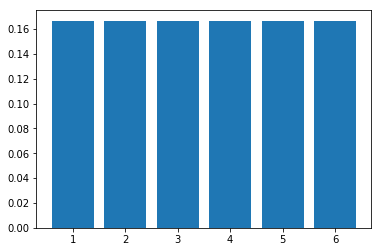

In [6]:
#In this lecture, we'll be talking about distributions. Specifically, we'll most often be referring to 
#probability distributions. That is, a function that gives you the likelihood of some outcome occuring,
#for every possible state. To make this a bit more concrete, let's look at a canonical example: dice 
#rolls. Assuming we have a fair die, we'd have a 1/6 chance of landing on any particular side. So, the 
#probability distribution looks like this:

import matplotlib.pyplot as plt

plt.bar(list(range(1,7)), [1/6 for i in range(6)])

|            6-sided die         |         12-sided die              |           120-sided die              |
|:------------------------------:| :-------------------------------: | :----------------------------------: |
|![6-sided die](6_sided_die.jpg) | ![12-sided die](12_sided_die.jpg) |  ![120-sided die](120_sided_die.jpg) |

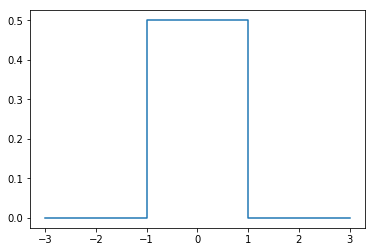

In [47]:
#In this case, we only have a fixed number of outcomes. But, what if we have a 12-sided die,
#or a 120-sided die? Or a million? The probability of any getting any particular number would get
#closer and closer to zero, and we'd essentially be working with continuous data.
#In other words, it becomes equally likely for some random variable X to take in outcomes somewhere 
#between a range of values. Then, we'd end up with something called a uniform distribution, which looks 
#like a flat top:

import numpy as np 

start = -1
stop = 1
x_range = stop - start
n = 10
x = list(np.linspace(start - x_range, start, n+1)) + \
    list(np.linspace(start, stop, n+1)) + \
    list(np.linspace(stop, stop + x_range, n+1))
y = [0 for i in range(n+1)] + [1/(x_range) for i in range(n+1)] +  [0 for i in range(n+1)]
plt.plot(x, y)

### Terminology: PDFs vs. CDFs

[0.5, 0.5]


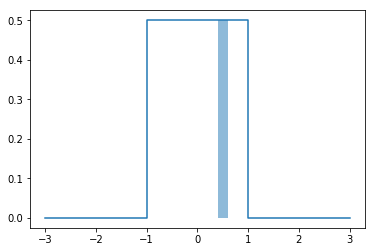

In [60]:
#Once again, if I were to ask, "What's the probability at EXACTLY x = 0.5 (with an infinite number of 
#zeros)?". Well, the answer would be zero! However, a better question might be, "What's the probability 
#of getting a value between 0.4 and 0.6?" This would simply be the area under the curve between 0.4 and
#0.6:

import math

plt.plot(x, y)
print([y[i] for i in range(len(y)) if math.isclose(x[i], 0.4) or math.isclose(x[i], 0.6)])
plt.fill_between([0.4, 0.6], 0.5, alpha=0.5)

$$Area = h * w = 0.5 * \frac{1}{0.6-0.4} = 0.1$$

In [ ]:
#The plot above is an example of a probability density function, which has the important property
#that every y-probability, corresponding to some x, must be between 0 and 1. Also, the total the
#total area under the curve MUST sum to one. After all, we're 100% guaranteed to land on some 
#possible state. For those of you familiar with calculus, in general, the probability of an outcome 
#between a given range is:

$$P(a < X < b) = \int_a^b pdf(x) dx$$

In [ ]:
#However, don't worry if you aren't sure what an integral is. The main idea you need to know is that the 
#probability that a random variable takes on a value between some range, is simply the area under that 
#part of the curve.

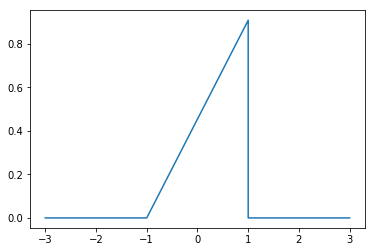

In [63]:
#Something else you might run across is a CDF, or a cumulative distribution function. As the name implies, 
#this function *accumulates* probability and gives you the total probability of being less than or equal 
#to some x value. 

#So for example, what would the corresponding CDF look like for the uniform distribution above?
#Well, at -1, we'd have accumulated zero probability, since P(X <= -1) = 0. 
#Now let's continue along the x-axis. At X=0, we've sort of split the distribution in half,
#and since the distribution is uniform, this means there's a 50% chance P(X <= 0).
#Finally, the probability P(X <= 1) is 100%, and so, if we plot these points, we get some sort of 
#linear graph, where the area under the curve looks like a triangle.

y_cdf = [0 for i in range(n+1)] + [i/(n+1) for i in range(n+1)] +  [0 for i in range(n+1)]
plt.plot(x, y_cdf)

### Other Common Types of Distributions

Now, while a uniform distribution is easy to work with, in many practical applications, it's unlikely that every outcome will occur with equal probability. For, instance, we could fabricate some weighted dice. And, while we don't condone cheating on games, this would definitely alter our probability distribution!

![weighted dice](weighted.jpg) 


<BarContainer object of 6 artists>

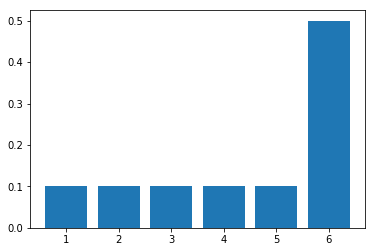

In [67]:
#So, there are numerous ways of weighting dice, some of which are shown in the pictures above. 
#Let's pretend we end up drilling holes. How might the probability distribution look now?

plt.bar(list(range(1,7)), [1/10 if i != 5 else 1/2 for i in range(6)])

### Bernoulli and Binomial Distributions

$$ Bin(k; n,p) = {n \choose k} p^k (1-p)^{n-k}$$

Text(0,0.5,'P(k; n, p)')

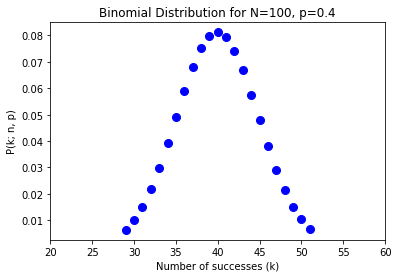

In [110]:
#Of course, these distributions don't necessariliy have to refer to physical objects.
#It's not often we come across a weighted coin, but there are many situations that are analogous to
#flipping a weighted coin. For instance, say that we run a company that produces battery packs, and
#we know that historically, roughly 3 in 1000 is defective. This is essentially flipping a weighted
#coin where p = 0.003 (probability of a defect) and 1-p = 0.997 (probability of a working product).

#This simple distribution with two outcomes is known as a Bernoulli distribution.
#However, say we want to know how likely it is for us to get more than 50 defects out of of our 
#total batch of 10000 batteries? To answer this, we can turn to the binomial distribution. 
#The pdf is shown above, where p is the probability of a "success" (or in our case, we're defining
#this as the probability of a defect), n is the total number of trials, and k is the number of 
#successes. Fortunately, you won't have to calculate this by hand! We'll use a scipy package to 
#simplify the process. First, let's plot the pdf for a simpler case:

import scipy.stats as stats
n, p = 100, 0.4
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8)
plt.xlim(20,60)
plt.title("Binomial Distribution for N=100, p=0.4")
plt.xlabel("Number of successes (k)")
plt.ylabel("P(k; n, p)")

In [107]:
#Now, let's say we wanted to get the specific probabilities for our parameters:
print("P(50; 10000, 0.003) =", binom.pmf(50, 10000, 0.003))
print("Probability of getting more than 50 defects:", 1-binom.cdf(50, 10000, 0.003))

#Note that getting more than 50 defects out of a batch of 10,000 isn't very likely at all!

P(50; 10000, 0.003) = 0.0002170321090618119
Probability of getting more than 50 defects: 0.0002914364940496128


### Normal Distributions

You may have noticed that the binomial distribution looks pretty similar to a normal distribution (bell curve). However, there are a few key diferences. For starters, one is a discrete distribution while the other is continuous. But, in a similar procedure discussed in the uniform distribution section above, if we let $N \rightarrow \infty$ or become sufficient large, the binomial distribution can be roughly approximated by a normal distribution with the following mean and variance:

$$N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
where
$$\mu = np$$
and 
$$\sigma^2 = np(1-p)$$

P(x < 35) = 0.4174843531794775


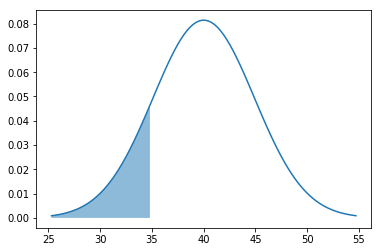

In [117]:
#Let's plot the pdf for the normal distribution and calculate some simple statistics. 
#If we use the parameters n=100 and p=0.4 from before...

mu = n * p
variance = n * p * (1-p)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) #create range of x-values +/- 3 stddevs from 0
plt.plot(x, stats.norm.pdf(x, mu, sigma))

#Comparing this to what we had before...it's pretty close! The same functions that applied 
#before work here as well. 

prob = stats.norm.cdf(35, mu, variance)
print("P(x < 35) =", prob)
x_vals = x[x < 35]
plt.fill_between(x_vals, 0, stats.norm.pdf(x_vals, mu, sigma), alpha=0.5)

#If you want to play around a bit more, here's a link to the documentation:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
#Normal distributions are frequently encountered in statistics, and we'll leverage our knowledge
#of this to conduct statistical tests in the next section. Yet, what happens when we don't have
#a good sense of what the population parameters are?

### Population Versus Samples: t-Distribution

In the case above, we somehow magically knew the firm's mean number of defects and standard deviation. In that case, looking at normal distribution is appropriate. Another random variable that's normally distributed might be people's heights. If we ask everyone in the world to report their height, we could compute a mean and standard deviation for the entire population. 

Unfortunately, in most cases, it's probably not feasible to ask every single person we're interested in. Instead, we can only take samples of the whole population. In these cases, we would want to draw inferences not with a normal distribution, but by using something called a t-distribution. 

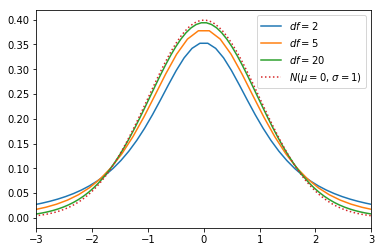

In [167]:
#The t-distribution takes in a parameter df, which stands for degrees of freedom. This is equal to 
#your sample size N, minus 1 (df = N-1). 

rv1 = stats.t(df=2)
x1 = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 1000)
y1 = rv1.pdf(x1)

rv2 = stats.t(df=5)
x2 = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
y2 = rv2.pdf(x2)

rv3 = stats.t(df=20)
x3 = np.linspace(rv3.ppf(0.0001), rv3.ppf(0.9999), 100)
y3 = rv3.pdf(x3)

rv4 = stats.norm()
x4 = np.linspace(rv4.ppf(0.0001), rv4.ppf(0.9999), 100)
y4 = rv4.pdf(x4)

plt.xlim(-3, 3)
plt.plot(x1,y1, label="$df=2$")
plt.plot(x2,y2, label="$df=5$")
plt.plot(x3,y3, label="$df=20$")
plt.plot(x4,y4, ':', label="$N(\mu=0$, $\sigma=1)$")
plt.legend()

#Notice that the t-distribution has fatter tails than a normal distribution. But, as N approaches 
#infinity (we have a larger sample size), the t-distribution is closer and closer to being a 
#standard normal curve (that's a normal distribution with mean 0 and variance 1, which is shown 
#by the dotted red line)

### Sampling Distributions and the Central Limit Theorem

Recall from a previous lecture where we talked about standardizing variables or computing a z-score; we can find the z-score of a single sample as follows:

$$ z_i = \frac{x_i - \mu}{\sigma} $$

However, what if we repeatedly take multiple samples, and then plot the mean of each sample in a so called "sampling distribution" instead? What would this distribution even look like? To find out, let's just take a bunch of samples (with the help of a computer of course), and then see what happens.

In [55]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#try sampling from different distributions
iterations = 200
n = 30 #sample size
x = [np.mean(np.random.randn(n)) for i in range(iterations)]
#x = [np.mean(np.random.exponential(scale=1.0, size=n)) for i in range(iterations)]
#x = [np.mean(np.random.uniform(low=-2.0, high=2.0, size=n)) for i in range(iterations)]

Traceback (most recent call last):
  File "/data1/home/liwarren/.local/share/virtualenvs/jupyter-crdWG09F/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/data1/home/liwarren/.local/share/virtualenvs/jupyter-crdWG09F/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/data1/home/liwarren/.local/share/virtualenvs/jupyter-crdWG09F/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [56]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == iterations: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-2, 2, 0.1)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-2,2,0,60])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('iter = {}\n n = {}'.format(curr, n), [-1.5,40])

<IPython.core.display.Javascript object>


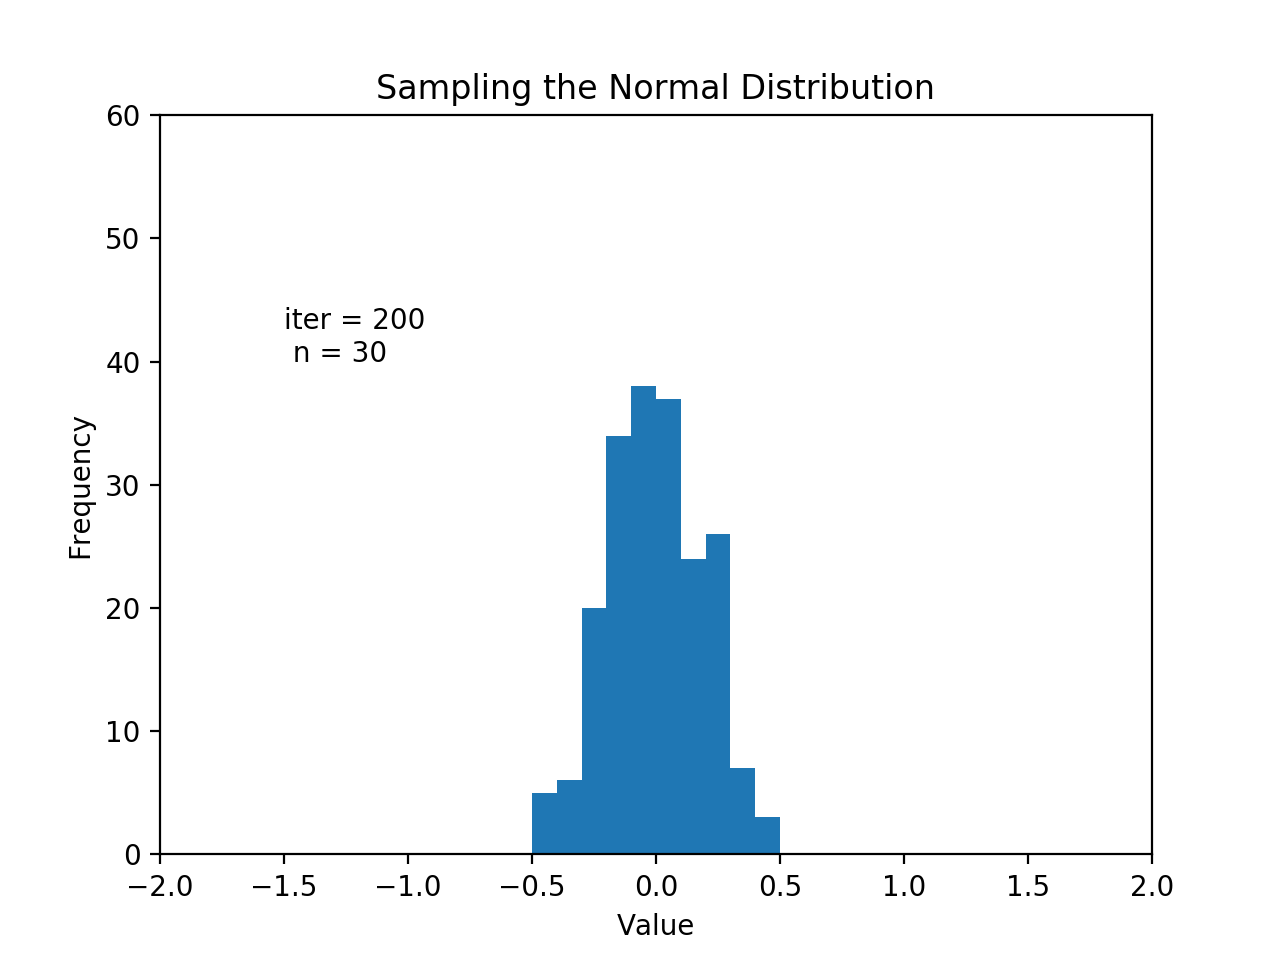

In [57]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=50)

Notice that the distribution is also normal, and it has mean roughly equal to 0 with a standard deviation of $\sigma/\sqrt{n}$, also known as the **standard error**, where n is the size of our samples. The z-score of the sampling distribution is just,

$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} .$$

This looks almost the same as the previous equation, but with a few key differences. For starters, we're taking a difference between individual sample means ($\bar{x}$) and the population mean ($\mu$). Also, we use the standard error instead. 

The cool thing is that the **Central Limit Theorem** states that this holds true even if we take samples from a non-normal distribution. Feel free to try sampling from the uniform distribution and exponential distributions by uncommenting out the appropriate lines above. One more thing to note, this is only valid if our sample size is sufficiently large. The rule of thumb is than $n \geq 30$. Try changing this and see what happens!

--------------------------

When we don't know the population standard deviation (or have really small samples), we have to instead calculate a t-score,

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} ,$$

where $s$ is exactly how you'd calculate a standard deviation normally, just with a slight correction:

$$ s = \sqrt{\frac{\sum(x_i-\bar{x})^2}{n-1}} $$


### Relationships: Choosing between distributions

Now, you might be thinking that this was a lot of material for one lecture! However, keep in mind that you don't need to memorize all of these distributions and their corresponding pdfs and cdfs. The important takeaway is that distributions help us model particular scenarios, and which one you choose will depend on the application you're working on. Also, there's a difference between looking at an entire population of interest, and taking samples from a population. Fortunately, the CLT provides us with some powerful insights that will allow us to compute statistics and draw inferences about your data, which we'll go over in the next section.

If you ever find yourself needing some help with picking the correct distribution, here's a list of resources that might help.

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

And just for fun, here's a somewhat complicated diagram showcasing a number of different distributions and how they relate to each other. (There's an even more detailed one in the links!)

![distributions](distributions.png) 

